<a href="https://colab.research.google.com/github/SriRamK345/ML_sample_DS_Sup_lerning/blob/main/LogR_sampleds1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [92]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**Initial Analysis**

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [94]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [95]:
df[["pclass","class"]]

,pclass,class
0,3,Third
1,1,First
2,3,Third
3,1,First
4,3,Third
...,...,...
886,2,Second
887,1,First
888,3,Third
889,1,First


In [96]:
# removing duplicate columns
df.drop(["class","alive","alone"],axis=1,inplace=True)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town
0,0,3,male,22.0,1,0,7.2500,S,man,True,NaN,Southampton
1,1,1,female,38.0,1,0,71.2833,C,woman,False,C,Cherbourg
2,1,3,female,26.0,0,0,7.9250,S,woman,False,NaN,Southampton
3,1,1,female,35.0,1,0,53.1000,S,woman,False,C,Southampton
4,0,3,male,35.0,0,0,8.0500,S,man,True,NaN,Southampton


**Exploratory data analysis (EDA)**
#Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods.

In [97]:
null_cal = []

for i in df.columns:
    x = df[i].isnull().sum()
    null_cal.append(x)

null_cal

[0, 0, 0, 177, 0, 0, 0, 2, 0, 0, 688, 2]

In [98]:
pd.DataFrame(null_cal,index=df.columns,columns=["Null Values"])

,Null Values
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
who,0
adult_male,0


In [99]:
df["deck"].value_counts()

deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64

In [100]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'who', 'adult_male', 'deck', 'embark_town'],
      dtype='object')

In [101]:
unique_values = []

for i in df.columns:
    x = df[i].value_counts().count()
    unique_values.append(x)

pd.DataFrame(unique_values,index=df.columns,columns=["Unique Values"])

,Unique Values
survived,2
pclass,3
sex,2
age,88
sibsp,7
parch,7
fare,248
embarked,3
who,3
adult_male,2


<Axes: xlabel='deck', ylabel='count'>

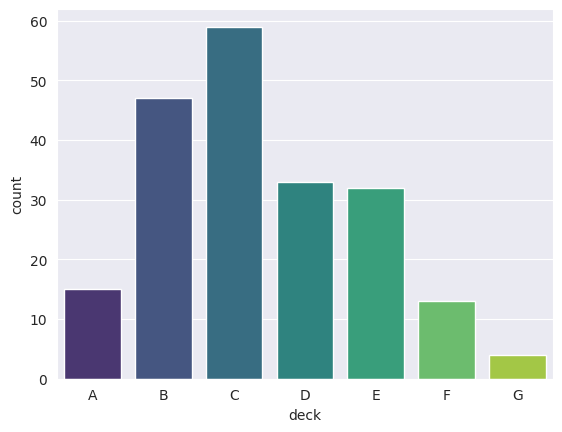

In [102]:
sns.set_style("darkgrid")
sns.countplot(x = "deck" ,data = df, palette="viridis")

<Axes: xlabel='deck', ylabel='count'>

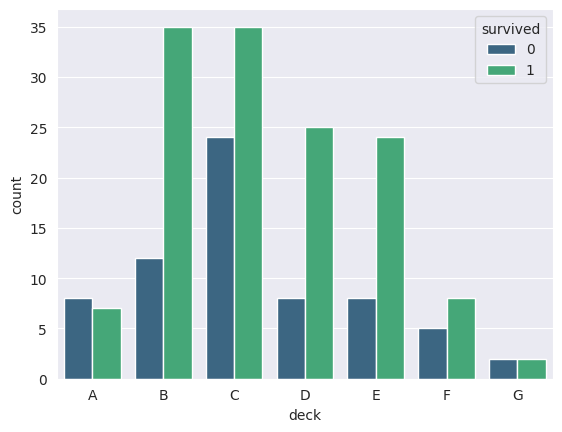

In [103]:
sns.set_style("darkgrid")
sns.countplot(x = "deck" ,data = df,hue="survived", palette="viridis") # comparing with target column

In [104]:
# sns.heatmap(df.corr(),annot=True,linewidth = 0.5,cmap="viridis")

In [105]:
df.drop("deck",axis=1,inplace=True)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,embark_town
0,0,3,male,22.0,1,0,7.2500,S,man,True,Southampton
1,1,1,female,38.0,1,0,71.2833,C,woman,False,Cherbourg
2,1,3,female,26.0,0,0,7.9250,S,woman,False,Southampton
3,1,1,female,35.0,1,0,53.1000,S,woman,False,Southampton
4,0,3,male,35.0,0,0,8.0500,S,man,True,Southampton


<Axes: xlabel='pclass', ylabel='age'>

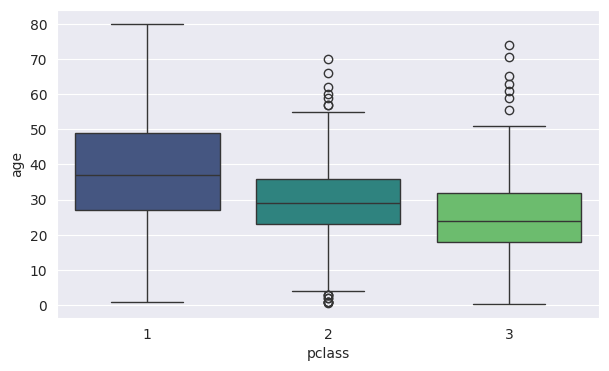

In [106]:
# comparing age with pclass
plt.figure(figsize=(7,4))
sns.boxplot(x="pclass",y="age",data=df,palette="viridis")

In [107]:
# # replacing null values
# df["age"].fillna(df.groupby("pclass")["age"].transform("mean"),inplace=True)
# df.info()

In [108]:
# we are replacing null values with mean of the pclass 1,2,3
def age_approx(cols):
    age = cols[0]
    pclass = cols[1]

    if pd.isnull(age):
        if pclass == 1:
            return 38
        elif pclass == 2:
            return 29
        else:
            return 24
    else:
        return age

In [109]:
df.age = df[["age","pclass"]].apply(age_approx,axis=1)

In [110]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
who            0
adult_male     0
embark_town    2
dtype: int64

In [111]:
df.dropna(inplace=True)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,embark_town
0,0,3,male,22.0,1,0,7.2500,S,man,True,Southampton
1,1,1,female,38.0,1,0,71.2833,C,woman,False,Cherbourg
2,1,3,female,26.0,0,0,7.9250,S,woman,False,Southampton
3,1,1,female,35.0,1,0,53.1000,S,woman,False,Southampton
4,0,3,male,35.0,0,0,8.0500,S,man,True,Southampton


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     889 non-null    int64  
 1   pclass       889 non-null    int64  
 2   sex          889 non-null    object 
 3   age          889 non-null    float64
 4   sibsp        889 non-null    int64  
 5   parch        889 non-null    int64  
 6   fare         889 non-null    float64
 7   embarked     889 non-null    object 
 8   who          889 non-null    object 
 9   adult_male   889 non-null    bool   
 10  embark_town  889 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 77.3+ KB


<Axes: xlabel='survived', ylabel='count'>

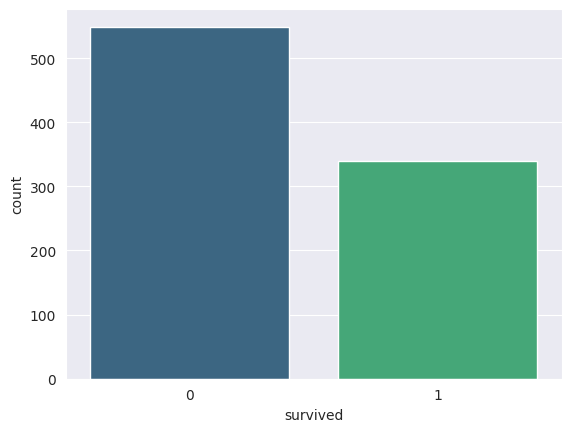

In [113]:
sns.countplot(x = "survived" ,data = df, palette="viridis")

In [114]:
df.survived.value_counts()

survived
0    549
1    340
Name: count, dtype: int64

<Axes: xlabel='survived', ylabel='count'>

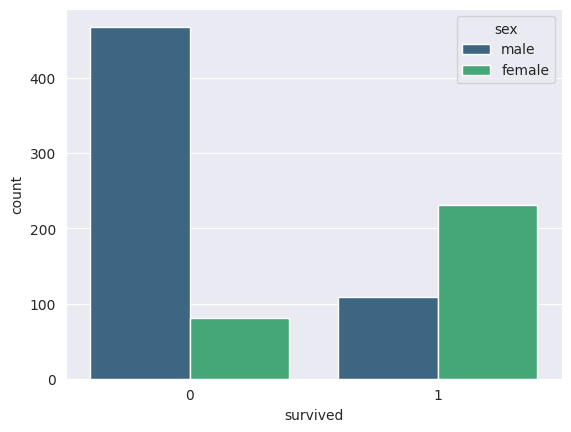

In [115]:
sns.countplot(x = "survived" ,hue = "sex", data = df, palette="viridis")

<Axes: xlabel='survived', ylabel='count'>

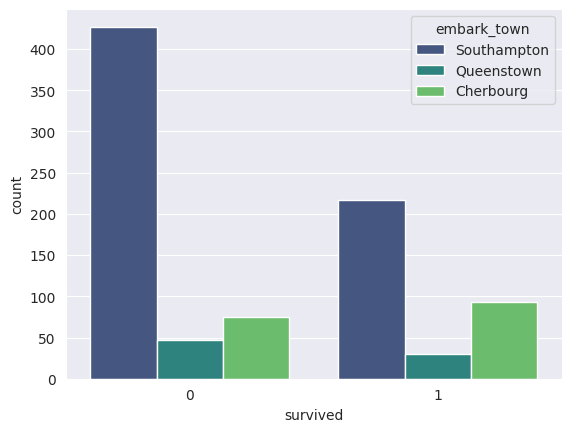

In [116]:
sns.countplot(x = "survived" ,hue = "embark_town", data = df, palette="viridis")

In [117]:
df.embark_town.value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

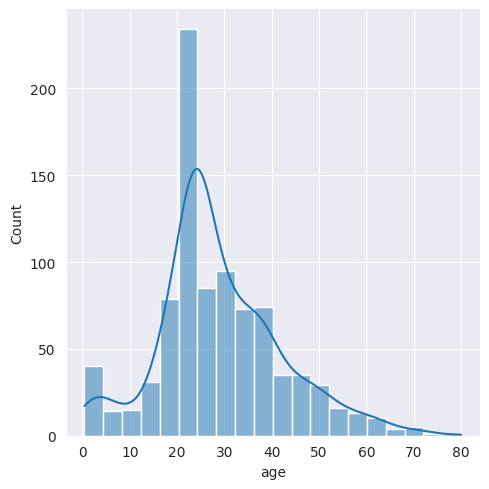

In [118]:
sns.displot(df,x="age",bins=20,kde=True)

In [119]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,embark_town
0,0,3,male,22.0,1,0,7.2500,S,man,True,Southampton
1,1,1,female,38.0,1,0,71.2833,C,woman,False,Cherbourg
2,1,3,female,26.0,0,0,7.9250,S,woman,False,Southampton
3,1,1,female,35.0,1,0,53.1000,S,woman,False,Southampton
4,0,3,male,35.0,0,0,8.0500,S,man,True,Southampton


<Figure size 1500x800 with 0 Axes>

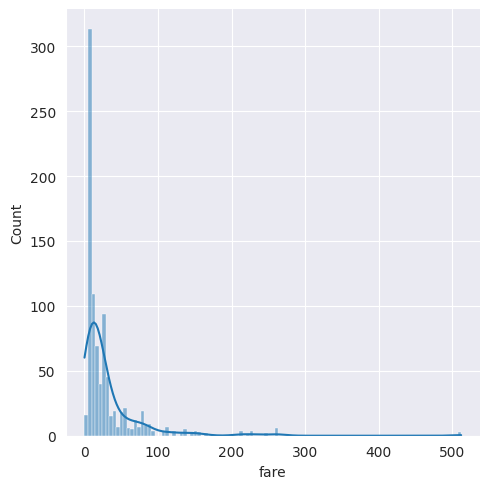

In [120]:
plt.figure(figsize=(15,8))
sns.displot(df,x="fare",kde=True)

In [123]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df["sex"] = le.fit_transform(df["sex"])
df["embarked"] = le.fit_transform(df["embarked"])
df["who"] = le.fit_transform(df["who"])
df["embark_town"] = le.fit_transform(df["embark_town"])
df["adult_male"] = le.fit_transform(df["adult_male"])
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,embark_town
0,0,3,1,22.0,1,0,7.2500,2,1,1,2
1,1,1,0,38.0,1,0,71.2833,0,2,0,0
2,1,3,0,26.0,0,0,7.9250,2,2,0,2
3,1,1,0,35.0,1,0,53.1000,2,2,0,2
4,0,3,1,35.0,0,0,8.0500,2,1,1,2


<Axes: >

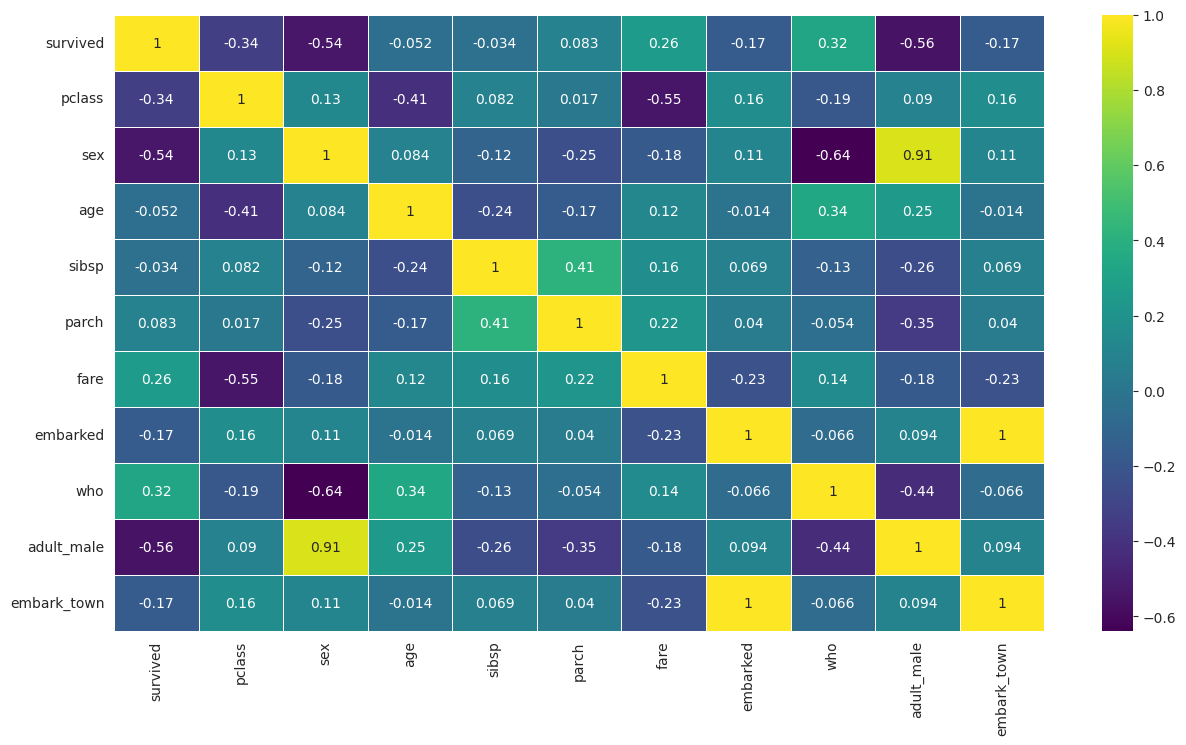

In [124]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,linewidth = 0.5,cmap="viridis")

In a correlation table (correlation matrix), the values typically range from -1 to 1. Here's how to interpret these values:

- **+1**: Perfect positive correlation (as one variable increases, the other variable also increases).
- **-1**: Perfect negative correlation (as one variable increases, the other variable decreases).
- **0**: No correlation (the variables do not affect each other).

### Highest and Lowest Correlation

- **Highest Correlation**: Look for values closest to +1. These indicate strong positive relationships.
- **Lowest Correlation**: Look for values closest to -1. These indicate strong negative relationships.
- **Near Zero**: Values close to 0 indicate weak or no correlation.

### Example

Suppose we have the following correlation matrix:

|           | Cat1_A | Cat1_B | Cat1_C | Cat2_X | Cat2_Y | Cat2_Z |
|-----------|--------|--------|--------|--------|--------|--------|
| **Cat1_A** | 1.0    | -0.5   | -0.5   | 0.5    | -0.1   | -0.4   |
| **Cat1_B** | -0.5   | 1.0    | -0.5   | -0.2   | 0.6    | 0.1    |
| **Cat1_C** | -0.5   | -0.5   | 1.0    | -0.3   | 0.1    | 0.2    |
| **Cat2_X** | 0.5    | -0.2   | -0.3   | 1.0    | -0.4   | -0.3   |
| **Cat2_Y** | -0.1   | 0.6    | 0.1    | -0.4   | 1.0    | -0.3   |
| **Cat2_Z** | -0.4   | 0.1    | 0.2    | -0.3   | -0.3   | 1.0    |

### Finding the Highest and Lowest Correlation

1. **Highest Positive Correlation**: Look for the largest value closest to +1 (excluding the diagonal, which is always 1.0 because it’s the correlation of each variable with itself).

    In this example, the highest positive correlation is between `Cat1_B` and `Cat2_Y` with a value of **0.6**.

2. **Lowest Negative Correlation**: Look for the smallest value closest to -1.

    In this example, the lowest negative correlation is between `Cat1_A` and `Cat1_B` or `Cat1_A` and `Cat1_C` with a value of **-0.5**.

### Steps to Handle Correlated Features

1. **Identify Highly Correlated Features**:
    - Use a correlation matrix to identify pairs of features with high correlation (e.g., absolute correlation values above 0.8 or 0.9).

2. **Evaluate the Impact**:
    - Consider the impact of each feature on the model. Sometimes domain knowledge helps in deciding which features are more important.
    - Use feature importance scores from models like Random Forest, Gradient Boosting, or feature selection techniques.

3. **Remove Redundant Features**:
    - If two features are highly correlated, consider removing one of them. You can choose to remove the feature that is less important or redundant.
    - For linear models, removing multicollinear features can improve model interpretability and performance.

### Additional Considerations

- **Feature Engineering**: Sometimes combining correlated features into a single feature (e.g., through Principal Component Analysis or feature interactions) can capture the necessary information while reducing redundancy.
- **Model Type**: The approach to handling correlations might differ based on the model. For example, tree-based models like Random Forest and Gradient Boosting are less sensitive to multicollinearity compared to linear models.
- **Regularization**: For linear models, using regularization techniques (Lasso, Ridge) can help manage multicollinearity by penalizing large coefficients.

By carefully handling highly correlated features, you can improve your model's performance and ensure that it generalizes better to unseen data.


**Modelling**

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [126]:
X = df.drop("survived",axis=1)
y = df["survived"]

In [127]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [128]:
LR_model = LogisticRegression()
LR_model.fit(X_train,y_train) # training the model
y_pred = LR_model.predict(X_test) # predicting the model

In [129]:
accuracy_score(y_test,y_pred)

0.8202247191011236

In [130]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       109
           1       0.75      0.80      0.77        69

    accuracy                           0.82       178
   macro avg       0.81      0.82      0.81       178
weighted avg       0.82      0.82      0.82       178



In [131]:
confusion_matrix(y_test, y_pred)

array([[91, 18],
       [14, 55]])

In [132]:
# cross validation

from sklearn.model_selection import cross_val_score
score = cross_val_score(LR_model,X,y,cv=5)

In [134]:
score.mean()

0.8211959626737764